### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


**(1) What is the independent variable? What is the dependent variable?**

The independent variable is the condition, which is either congruent or incongruent. The dependent variable is the  time to complete the task.

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

I expect that response time will be longer under the incongruent condition:

**Null hypothesis**

$ \mu_i \leq \mu_c $

**Alternative hypothesis**

$ \mu_i > \mu_c $

**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [55]:
# Perform the analysis here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import t
from math import sqrt

data = pd.read_csv('stroopdata.csv')
display(data)
display(data.describe())

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


There are 24 response times for each condition. The mean response time for the congruent condition is 14.051125, while the mean response time for the incongruent condition is 22.015917. The standard deviation for the congruent condition is 3.559358; the standard deviation for the incongruent condition is 4.797057. The mean, median, and standard deviation are all larger for the incongruent condition.

**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

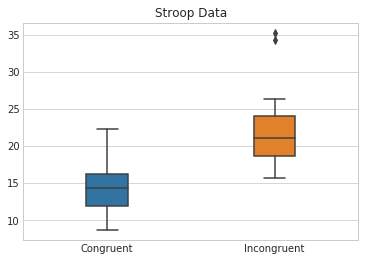

In [35]:
# Build the visualizations here
sns.set_style("whitegrid")
ax = sns.boxplot(data=data, width=.25)
ax.set_title("Stroop Data")
plt.show()

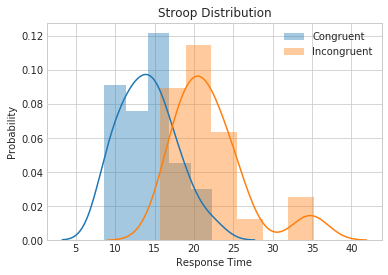

In [41]:
sns.set_style("whitegrid")
ax = sns.distplot(data["Congruent"], label="Congruent")
ax = sns.distplot(data["Incongruent"], label="Incongruent")
ax.set_title("Stroop Distribution")
ax.set(xlabel="Response Time", ylabel="Probability")
plt.legend()
plt.show()

The box plots reiterate that the descriptive values are all higher for the incongruent case. Some outliers can also be observed in the box plot for the incongruent cases.

The outliers are also visible in the distribution for incongruent cases. The distributions for both the congruent cases and the incongruent cases are both skewed to the right, but the times can still be seen to be greater. 

**(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? *Hint:*  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.**

In [57]:
count = len(data)
count

24

In [53]:
# Calculate the t-critical value
t_crit = t.ppf(.95, 23)
t_crit

1.7138715277470473

Confidence interval: 95%

Degrees of freedom: 23

t-critical value: 1.7138715277470473

In [50]:
# Calculate the differences between congruent and incongruent times
data["Diff"] = data["Incongruent"] - data["Congruent"]
# Calculate the diffrence between the means
diff_mean = data["Diff"].mean()
diff_mean

7.9647916666666658

In [51]:
# Standard deviation of differences
diff_std = data["Diff"].std()
diff_std

4.8648269103590556

In [61]:
# t-statistic 
t_stat = diff_mean / (diff_std / sqrt(count))
t_stat

8.020706944109957

In [62]:
t_stat > t_crit

True

I used the critcal value approach to perform the test. In this case, the t-statistic is greater than the t critical value. Therefore, we can reject the null hypothesis. As expected, the incongruent task took longer time to complete.

**(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

For some reason, being able to read the words slows down reaction time when trying to name the color. For instance: I tried these tasks and I was slower (as expected) in the incongruent task: however, if I tried these tasks in a different language (especially one with a different alphabet), I suspect my time would be similar in both cases.

**List of Outside Resources**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

https://newonlinecourses.science.psu.edu/statprogram/node/137/

http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/

https://www.youtube.com/watch?v=gBm0QMav9ZM
